In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
xaxisfigure21 = np.linspace(0,np.pi,10)
def probabilitytheorem3(beta,alpha,m):
    z = (math.cos((beta-alpha)/2))**(2*m)
    return(z)
def probabilityq(angle,m):
    z = (math.cos(angle/2))**(2*m)
    return(z)
def bernoulli(n, q):
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < q:
            n_success += 1
    return(n_success)
def anglep(a,m):
    p = a/(8000)
    alpha = math.acos(2*(p**(1/m))-1) 
    #alpha = 2*math.acos(p**(1/(2*m))) 
    return(alpha)
def anglep1(a):
    p1 = a/(10**3)
    return(p1)
def dichotomy_search_1(beta,n,m):
    k = 2
    low = 0
    high = np.pi
    for i in range(k):
        mid = (low + high) / 2.0
        pl = anglep1(bernoulli(n,probabilitytheorem3(beta,low,m)))
        ph = anglep1(bernoulli(n,probabilitytheorem3(beta,high,m)))
        if (pl > ph):
            high = mid
        else:
            low = mid
    return(low,high)     
def mae(beta,n,m):
    alphas = []
    for i in range(n):
        alphas.append(abs(anglep(bernoulli(8000,(probabilityq(beta-dichotomy_search_1(beta,10**3,m)[0],m))),m)-(beta-dichotomy_search_1(beta,10**3,m)[0])))
    Sum = sum(alphas)
    result = Sum/n
    return(result)
def y_axis(m):
    y_axis_1 = []
    for i in xaxisfigure21:
        y_axis_1.append(mae(i,8000,m))
    return(y_axis_1)

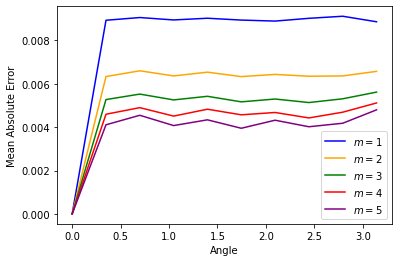

In [21]:
plt.plot(xaxisfigure21, y_axis(1), color='blue', label = "$m=1$")
plt.plot(xaxisfigure21, y_axis(2), color='orange', label = "$m=2$")
plt.plot(xaxisfigure21, y_axis(3), color='green', label = "$m=3$")
plt.plot(xaxisfigure21, y_axis(4), color='red', label = "$m=4$")
plt.plot(xaxisfigure21, y_axis(5), color='purple', label = "$m=5$")

plt.xlabel("Angle")
plt.ylabel("Mean Absolute Error")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.show()

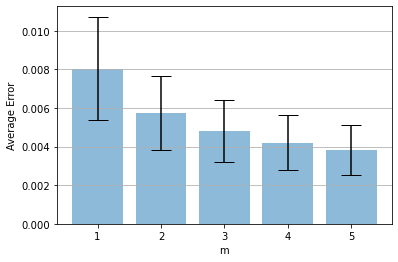

In [25]:
# Calculate the average
m1_mean = np.mean(y_axis(1))
m2_mean = np.mean(y_axis(2))
m3_mean = np.mean(y_axis(3))
m4_mean = np.mean(y_axis(4))
m5_mean = np.mean(y_axis(5))
# Calculate the standard deviation
m1_std = np.std(y_axis(1))
m2_std = np.std(y_axis(2))
m3_std = np.std(y_axis(3))
m4_std = np.std(y_axis(4))
m5_std = np.std(y_axis(5))
# Define labels, positions, bar heights and error bar heights
labels = ['1', '2', '3', '4', '5']
x_pos = np.arange(len(labels))
m = [m1_mean, m2_mean, m3_mean, m4_mean, m5_mean]
error = [m1_std, m2_std, m3_std, m4_std, m5_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, m,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average Error')
ax.set_xlabel('m')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# Save the figure and show
plt.show()